In [1]:
pip install pandas numpy matplotlib seaborn plotly geopandas scikit-learn folium

Note: you may need to restart the kernel to use updated packages.


In [40]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Geospatial Analysis
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Preprocessing & Feature Engineering
from sklearn.preprocessing import PolynomialFeatures

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Mathematical Functions
from math import radians, sin, cos, sqrt, atan2

# Dash for Interactive Visualizations
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Colormap for Visualization
from matplotlib.colors import LinearSegmentedColormap

sns.set_style("whitegrid")
plt.style.use("seaborn")

/var/folders/29/gn_9k02539515njtq6v8rrlm0000gn/T/ipykernel_51984/1372765646.py:39: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [3]:
# Load the dataset (replace with your dataset path)
# For this example, we'll create a synthetic dataset
data = {
    "City": ["Portland", "Eugene", "Salem", "Bend", "Medford", "Corvallis", "Springfield", "Beaverton", "Hillsboro", "Gresham"],
    "Latitude": [45.5051, 44.0521, 44.9429, 44.0582, 42.3265, 44.5646, 44.0462, 45.4871, 45.5229, 45.5008],
    "Longitude": [-122.6750, -123.0868, -123.0351, -121.3153, -122.8756, -123.2620, -123.0227, -122.8037, -122.9898, -122.4305],
    "Price": [550000, 400000, 350000, 600000, 320000, 420000, 330000, 500000, 480000, 370000],
    "Bedrooms": [3, 2, 3, 4, 2, 3, 3, 4, 3, 3],
    "Bathrooms": [2, 1, 2, 3, 2, 2, 2, 3, 2, 2],
    "SquareFeet": [2000, 1500, 1800, 2500, 1600, 1900, 1700, 2200, 2100, 1800],
}
df = pd.DataFrame(data)

# Display the dataset
print(df.head())

       City  Latitude  Longitude   Price  Bedrooms  Bathrooms  SquareFeet
0  Portland   45.5051  -122.6750  550000         3          2        2000
1    Eugene   44.0521  -123.0868  400000         2          1        1500
2     Salem   44.9429  -123.0351  350000         3          2        1800
3      Bend   44.0582  -121.3153  600000         4          3        2500
4   Medford   42.3265  -122.8756  320000         2          2        1600


In [4]:
# Load Oregon map data
oregon_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
oregon_map = oregon_map[oregon_map.name == "United States of America"]

# Plot housing data on a map of Oregon
fig = px.scatter_geo(
    df,
    lat="Latitude",
    lon="Longitude",
    size="Price",
    color="Price",
    hover_name="City",
    scope="usa",
    title="Oregon Housing Prices",
    color_continuous_scale=["#8B5E3C", "#FF8C42", "#6A4C93"],  # Fall-inspired colors
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

/var/folders/29/gn_9k02539515njtq6v8rrlm0000gn/T/ipykernel_51984/2971967809.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  oregon_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [5]:
# Prepare data for machine learning
X = df[["Bedrooms", "Bathrooms", "SquareFeet"]]
y = df["Price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Linear Regression RMSE: 58365.67687624394
Random Forest RMSE: 56241.04126189546
Linear Regression R²: -1.129095148263823
Random Forest R²: -0.9769092013888923


In [6]:
# Create a Folium map centered on Oregon
oregon_map = folium.Map(location=[44.0, -120.5], zoom_start=7)

# Add a heatmap layer
heat_data = [[row["Latitude"], row["Longitude"], row["Price"]] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(oregon_map)

# Display the map
oregon_map

In [8]:


# Load the dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target


In [9]:
# Display basic info
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

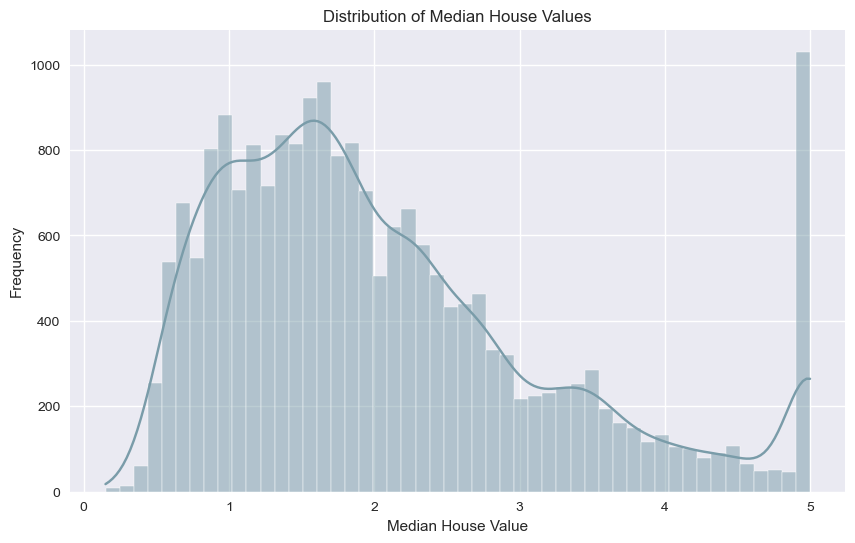

In [18]:
# Plot distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=50, color='#7A9CA9', kde=True)  # Rustic brown
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

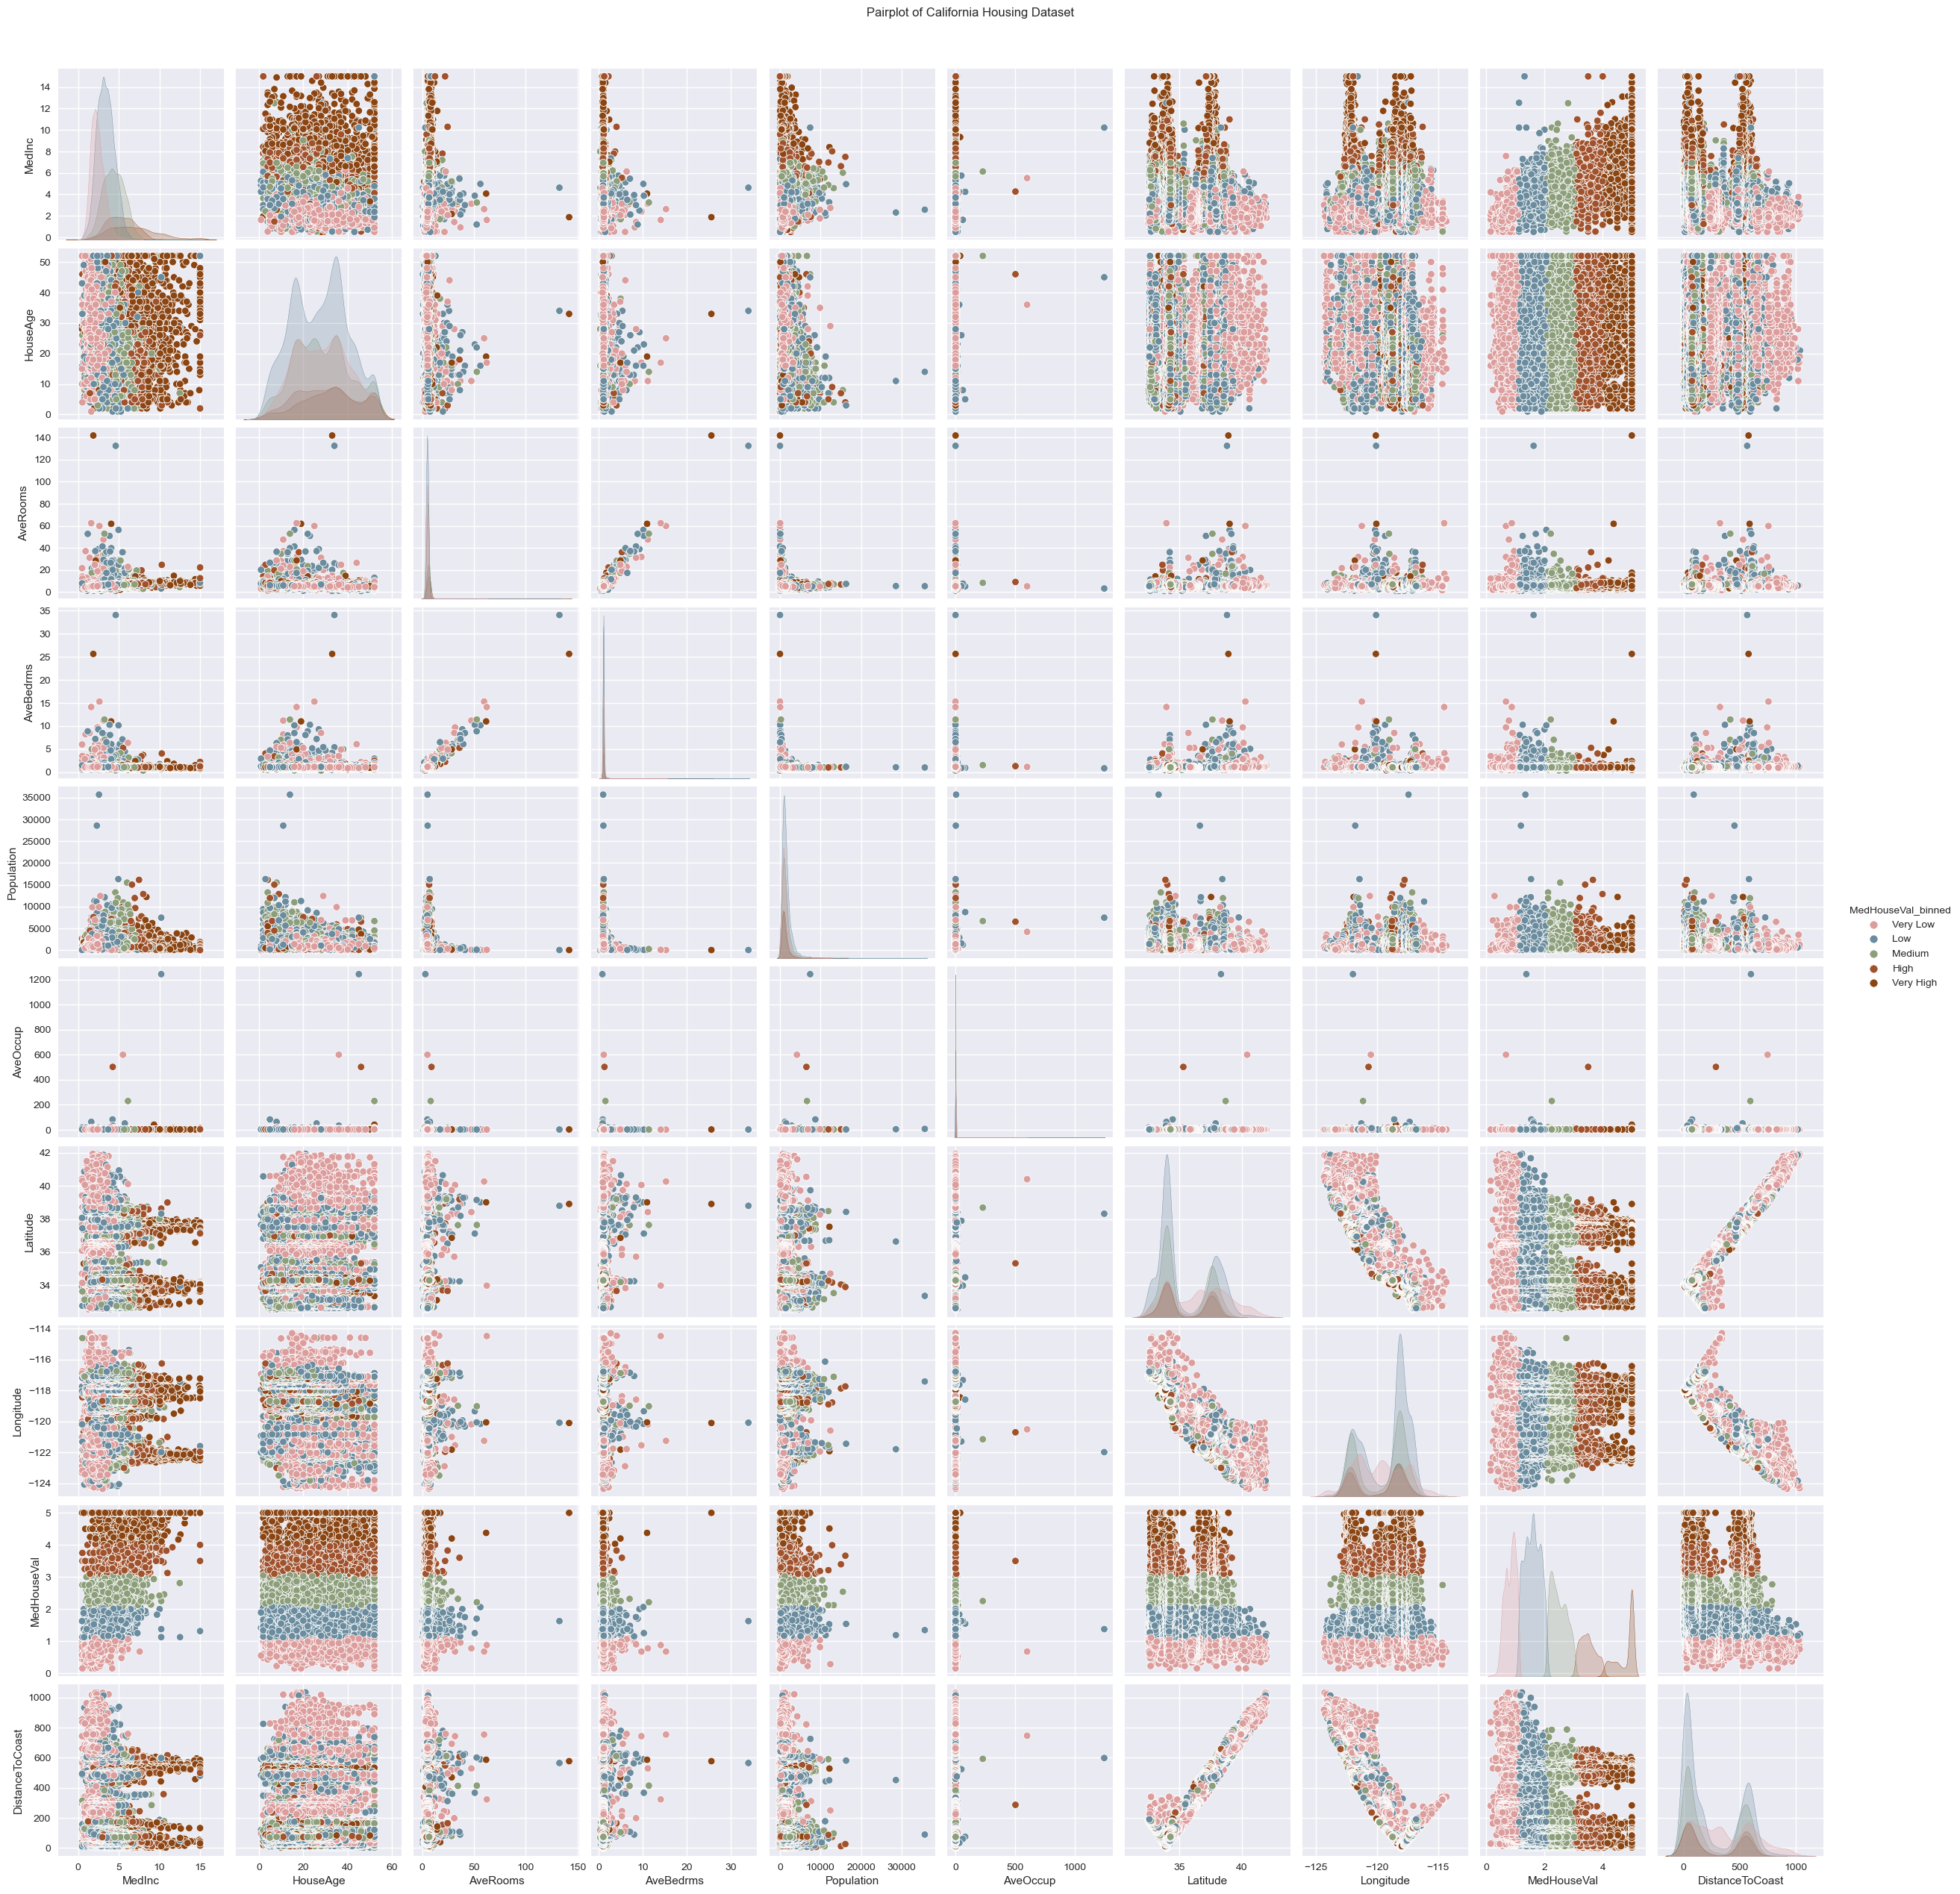

In [21]:

# Bin MedHouseVal into 5 categories
df['MedHouseVal_binned'] = pd.cut(df['MedHouseVal'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Pairplot with binned hue and rustic palette
sns.pairplot(df, hue='MedHouseVal_binned', palette=['#DC9D9D', '#6A8C9E', '#8C9E7A', '#A0522D', '#8B4513'])
plt.suptitle('Pairplot of California Housing Dataset', y=1.02)
plt.show()


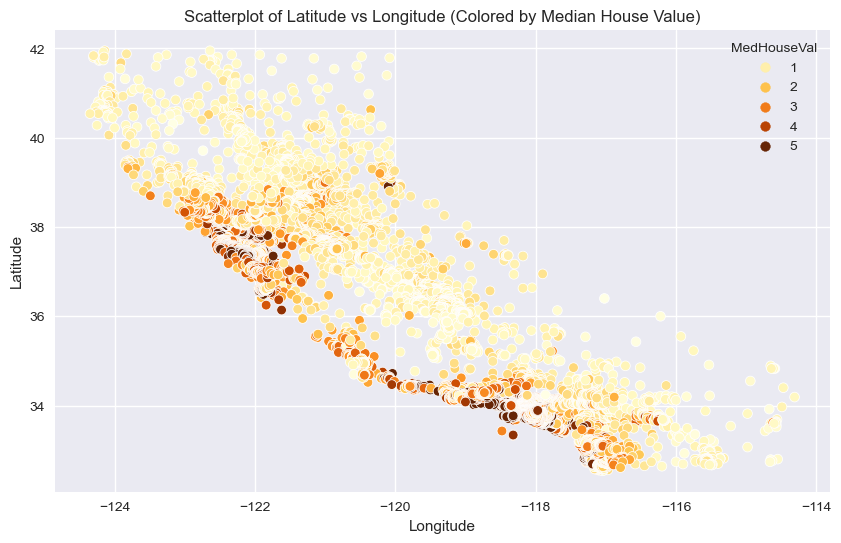

In [22]:
# Scatterplot with continuous hue and a rustic colormap
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['MedHouseVal'], palette='YlOrBr')  # Rustic colormap
plt.title('Scatterplot of Latitude vs Longitude (Colored by Median House Value)')
plt.show()

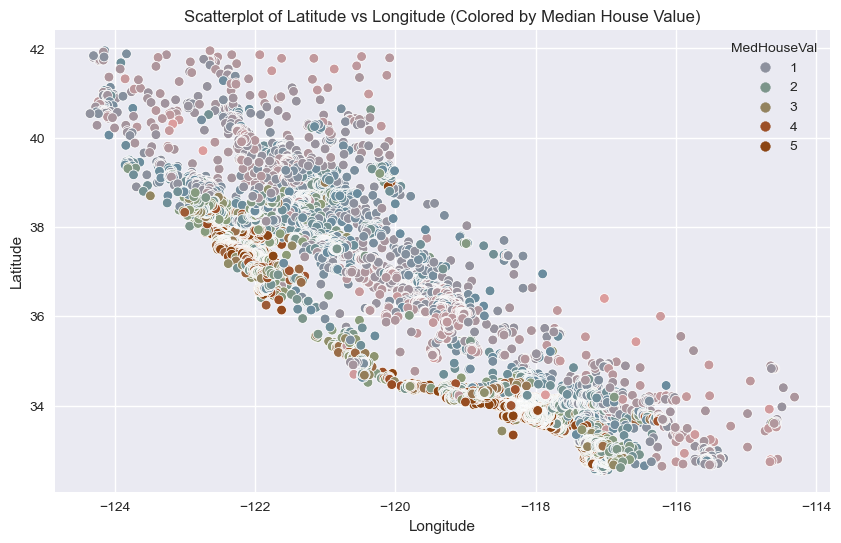

In [23]:
# Define a custom rustic colormap
rustic_colors = ['#DC9D9D', '#6A8C9E', '#8C9E7A', '#A0522D', '#8B4513']
rustic_cmap = LinearSegmentedColormap.from_list('rustic', rustic_colors)

# Scatterplot with custom continuous colormap
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['MedHouseVal'], palette=rustic_cmap)
plt.title('Scatterplot of Latitude vs Longitude (Colored by Median House Value)')
plt.show()

/var/folders/29/gn_9k02539515njtq6v8rrlm0000gn/T/ipykernel_51984/1401645111.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



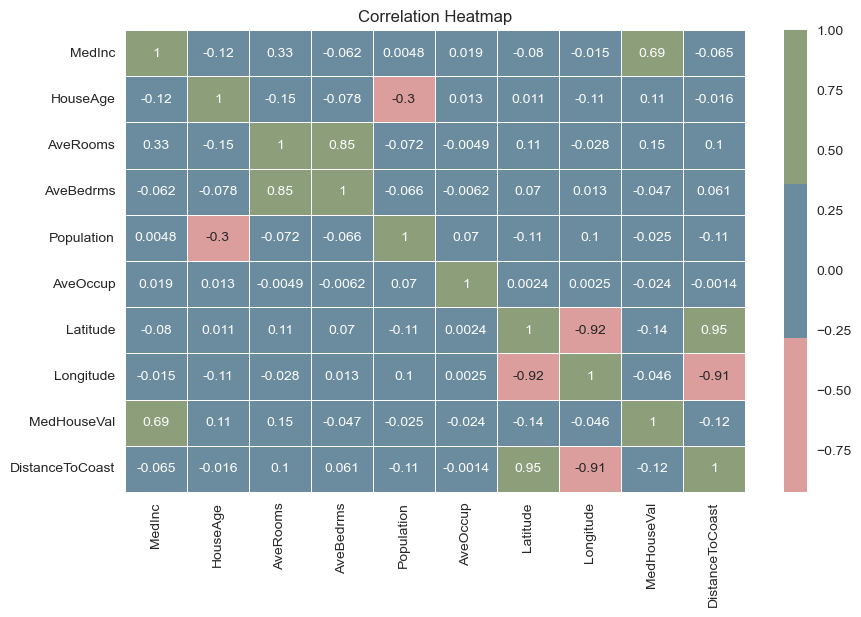

In [26]:
# Correlation heatmap with rustic colormap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap=['#DC9D9D', '#6A8C9E', '#8C9E7A'], linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [36]:
import folium
from folium.plugins import HeatMap

# Create a map centered on California
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add a heatmap of housing prices
heat_data = [[row['Latitude'], row['Longitude'], row['MedHouseVal']] for index, row in df.iterrows()]
HeatMap(heat_data, gradient={0.4: '#8B4513', 0.65: '#8C6A6A', 1: '#6A8C9E'}).add_to(california_map)

# Display the map
california_map.save('california_housing_heatmap.html')
california_map

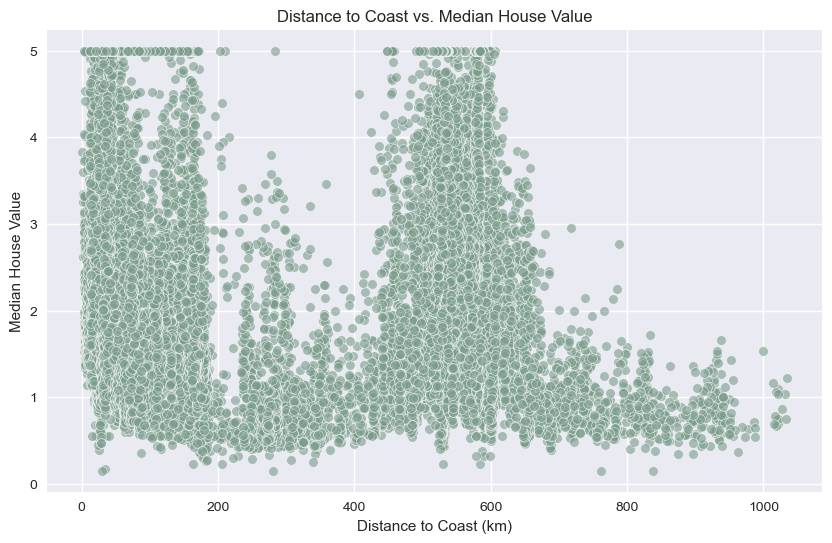

In [28]:
# Haversine formula to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Calculate distance to the coast (approximated as latitude 34, longitude -118)
df['DistanceToCoast'] = df.apply(lambda row: haversine(row['Latitude'], row['Longitude'], 34, -118), axis=1)

# Plot distance vs. house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['DistanceToCoast'], y=df['MedHouseVal'], color='#7A9C8C', alpha=0.6)
plt.title('Distance to Coast vs. Median House Value')
plt.xlabel('Distance to Coast (km)')
plt.ylabel('Median House Value')
plt.show()

In [30]:
# Drop the binned column (if it exists) to ensure only numeric data is used
df_numeric = df.drop(columns=['MedHouseVal_binned'], errors='ignore')

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df_numeric.drop(columns=['MedHouseVal']))
y = df_numeric['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.4418183596423809


In [31]:
# Create a Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='scatter-plot'),
    dcc.Slider(
        id='distance-slider',
        min=df['DistanceToCoast'].min(),
        max=df['DistanceToCoast'].max(),
        value=df['DistanceToCoast'].median(),
        marks={i: str(i) for i in range(int(df['DistanceToCoast'].min()), int(df['DistanceToCoast'].max()), 50)}
    )
])

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('distance-slider', 'value')]
)
def update_graph(selected_distance):
    filtered_df = df[df['DistanceToCoast'] <= selected_distance]
    fig = px.scatter(filtered_df, x='Longitude', y='Latitude', color='MedHouseVal',
                     color_continuous_scale=['#8B4513', '#A0522D', '#D2691E'],
                     title='California Housing Prices')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)